<a href="https://colab.research.google.com/github/olesok87/Protein_Design_1_Trp_cage/blob/main/Trp_cage_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Protein:** Trp-cage mini-protein  
**PDB reference:** 1L2Y  
**Length:** 20 residues  
**Goal:**  
1. Import AlphaFold-predicted structure of WT Trp-cage.  
2. Redesign sequence using ProteinMPNN.  
3. Fold redesigned sequences with AlphaFold (via ColabFold Notebook A).  
4. Analyze results: compare WT vs designs.  



In [ ]:
#run https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb


**Results**

***Trp_cage_2d763_relaxed_rank_001_alphafold2_ptm_model_5_seed_000***:

 Alphafold cycles and values fo the model (log file):

2025-10-03 19:23:54,494 alphafold2_ptm_model_5_seed_000 recycle=0 pLDDT=90.1 pTM=0.112

2025-10-03 19:23:54,636 alphafold2_ptm_model_5_seed_000 recycle=1 pLDDT=93.8 pTM=0.123 tol=0.251

2025-10-03 19:23:54,778 alphafold2_ptm_model_5_seed_000 recycle=2 pLDDT=94.3 pTM=0.125 tol=0.053

2025-10-03 19:23:54,920 alphafold2_ptm_model_5_seed_000 recycle=3 pLDDT=94.9 pTM=0.125 tol=0.0523


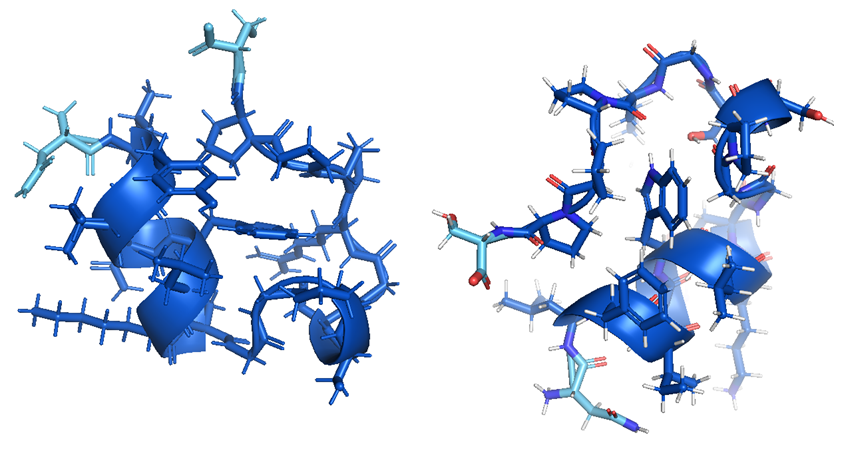

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls -la /content/drive/MyDrive




# Point to the AlphaFold output folder
af2_results = "/content/drive/MyDrive/Miniproject1/AF2_results/"
!ls $af2_results



Mounted at /content/drive
total 16
drwx------ 2 root root 4096 Oct  3 19:01 'Colab Notebooks'
drwx------ 2 root root 4096 Oct  4 16:41  .ipynb_checkpoints
drwx------ 2 root root 4096 Oct  4 16:42  Miniproject1
drwx------ 2 root root 4096 Oct  4 21:22  ProteinMPNN
config.json
log.txt
Trp_cage_2d763.a3m
Trp_cage_2d763_coverage.png
Trp_cage_2d763.csv
Trp_cage_2d763_pae.png
Trp_cage_2d763_plddt.png
Trp_cage_2d763_predicted_aligned_error_v1.json
Trp_cage_2d763_relaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb
Trp_cage_2d763_scores_rank_001_alphafold2_ptm_model_5_seed_000.json
Trp_cage_2d763_scores_rank_002_alphafold2_ptm_model_2_seed_000.json
Trp_cage_2d763_scores_rank_003_alphafold2_ptm_model_1_seed_000.json
Trp_cage_2d763_scores_rank_004_alphafold2_ptm_model_3_seed_000.json
Trp_cage_2d763_scores_rank_005_alphafold2_ptm_model_4_seed_000.json
Trp_cage_2d763_template_domain_names.json
Trp_cage_2d763_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb
Trp_cage_2d763_unrelaxed_rank_002_a

In [ ]:
# Clone ProteinMPNN
# Clone to local runtime (faster & more stable)
%cd /content
!git clone https://github.com/dauparas/ProteinMPNN.git
%cd ProteinMPNN
!ls -la

# Install deps
!pip install -q torch biopython numpy



/content
Cloning into 'ProteinMPNN'...
remote: Enumerating objects: 634, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 634 (delta 151), reused 146 (delta 146), pack-reused 363 (from 1)
Receiving objects: 100% (634/634), 119.90 MiB | 30.19 MiB/s, done.
Resolving deltas: 100% (290/290), done.
/content/ProteinMPNN
total 164
drwxr-xr-x 12 root root  4096 Oct  4 21:50 .
drwxr-xr-x  1 root root  4096 Oct  4 21:50 ..
drwxr-xr-x  2 root root  4096 Oct  4 21:50 ca_model_weights
drwxr-xr-x  2 root root  4096 Oct  4 21:50 colab_notebooks
drwxr-xr-x  2 root root  4096 Oct  4 21:50 examples
drwxr-xr-x  8 root root  4096 Oct  4 21:50 .git
-rw-r--r--  1 root root  1799 Oct  4 21:50 .gitignore
drwxr-xr-x  3 root root  4096 Oct  4 21:50 helper_scripts
drwxr-xr-x  6 root root  4096 Oct  4 21:50 inputs
-rw-r--r--  1 root root  1072 Oct  4 21:50 LICENSE
drwxr-xr-x 14 root root  4096 Oct  4 21:50 outputs
-rw-r--r--  1 root root 29312 

In [ ]:
#run MPNN
import os

# Use WT AlphaFold PDB as backbone input
pdb_input = af2_results + "Trp_cage_2d763_relaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb"
output_dir = "/content/drive/MyDrive/Miniproject1/MPNN_out"
os.makedirs(output_dir, exist_ok=True)

!cd /content/ProteinMPNN

# Run ProteinMPNN (20 sequences)
!python protein_mpnn_run.py \
    --pdb_path $pdb_input \
    --out_folder $output_dir \
    --num_seq_per_target 20


----------------------------------------
chain_id_jsonl is NOT loaded
----------------------------------------
fixed_positions_jsonl is NOT loaded
----------------------------------------
pssm_jsonl is NOT loaded
----------------------------------------
omit_AA_jsonl is NOT loaded
----------------------------------------
bias_AA_jsonl is NOT loaded
----------------------------------------
tied_positions_jsonl is NOT loaded
----------------------------------------
bias by residue dictionary is not loaded, or not provided
----------------------------------------
----------------------------------------
Number of edges: 48
Training noise level: 0.2A
Generating sequences for: Trp_cage_2d763_relaxed_rank_001_alphafold2_ptm_model_5_seed_000
20 sequences of length 20 generated in 4.7481 seconds


In [ ]:
# Run Alphafold on generated sequences in the batch mode
https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/batch/AlphaFold2_batch.ipynb#scrollTo=AwvIWN3HDyUJ


In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls -la /content/drive/MyDrive



Mounted at /content/drive
total 16
drwx------ 2 root root 4096 Oct  3 19:01 'Colab Notebooks'
drwx------ 2 root root 4096 Oct  4 16:41  .ipynb_checkpoints
drwx------ 2 root root 4096 Oct  4 16:42  Miniproject1
drwx------ 2 root root 4096 Oct  4 21:22  ProteinMPNN
ls: cannot access '/content/drive/MyDrive/Miniproject1/AF_on_MPNN/': No such file or directory


In [ ]:
# Unzip and pick the highest scoring .pdb and .json from each design

# ====== Google Colab: Extract FIRST .pdb and .json from each ZIP (archive order) ======
from google.colab import drive
drive.mount('/content/drive')

import os, zipfile, shutil
from tqdm.notebook import tqdm

# --- CONFIG ---
input_dir   = "/content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/zipped_models"   # folder with ColabFold ZIPs
pdb_out_dir = "/content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/best_pdbs"           # folder to store best .pdb files
json_out_dir = "/content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/best_json"         # folder to store matching .json files

os.makedirs(pdb_out_dir, exist_ok=True)
os.makedirs(json_out_dir, exist_ok=True)

# --- Process each zip file ---
zip_files = [f for f in sorted(os.listdir(input_dir)) if f.lower().endswith('.zip')]
print(f"Found {len(zip_files)} zip files in {input_dir}")

for zname in tqdm(zip_files, desc="Processing ZIPs"):
    zpath = os.path.join(input_dir, zname)
    base = os.path.splitext(zname)[0]

    try:
        with zipfile.ZipFile(zpath, 'r') as zf:
            members = zf.namelist()

            # Find first PDB and JSON (in archive order)
            best_pdb = None
            best_json = None

            for member in members:
                if member.endswith("/"):  # skip folders
                    continue
                if member.lower().endswith(".pdb") and best_pdb is None:
                    best_pdb = member
                elif member.lower().endswith(".json") and best_json is None:
                    best_json = member
                if best_pdb and best_json:
                    break  # stop once both found

            # --- Extract PDB ---
            if best_pdb:
                with zf.open(best_pdb) as src:
                    out_name = f"{base}_{os.path.basename(best_pdb)}"
                    out_path = os.path.join(pdb_out_dir, out_name)
                    with open(out_path, "wb") as dst:
                        shutil.copyfileobj(src, dst)
            else:
                print(f"⚠️  No PDB in {zname}")

            # --- Extract JSON ---
            if best_json:
                with zf.open(best_json) as src:
                    out_name = f"{base}_{os.path.basename(best_json)}"
                    out_path = os.path.join(json_out_dir, out_name)
                    with open(out_path, "wb") as dst:
                        shutil.copyfileobj(src, dst)
            else:
                print(f"⚠️  No JSON in {zname}")

            print(f"✅ Extracted from {zname}: {os.path.basename(best_pdb) if best_pdb else ''}, {os.path.basename(best_json) if best_json else ''}")

    except Exception as e:
        print(f"❌ Error with {zname}: {e}")

print("\n🎉 Done!")
print(f"Best PDBs → {pdb_out_dir}")
print(f"Best JSONs → {json_out_dir}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 21 zip files in /content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/zipped_models


Processing ZIPs:   0%|          | 0/21 [00:00<?, ?it/s]

✅ Extracted from design_01.result.zip: design_01_unrelaxed_rank_001_alphafold2_ptm_model_2_seed_000.pdb, config.json
✅ Extracted from design_02.result.zip: design_02_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb, config.json
✅ Extracted from design_03.result.zip: design_03_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb, config.json
✅ Extracted from design_04.result.zip: design_04_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb, config.json
✅ Extracted from design_05.result.zip: design_05_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb, config.json
✅ Extracted from design_06.result.zip: design_06_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb, config.json
✅ Extracted from design_07.result.zip: design_07_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb, config.json
✅ Extracted from design_08.result.zip: design_08_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb, config.json
✅ Extracted from design_09.result.zip: design_09_unrelaxed_rank_

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded parsed CSV: /content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/parsed_log_full_table.csv
Found 22 designs (order preserved). Example: ['Renamed', 'design_01', 'design_02', 'design_03', 'design_04', 'design_05']


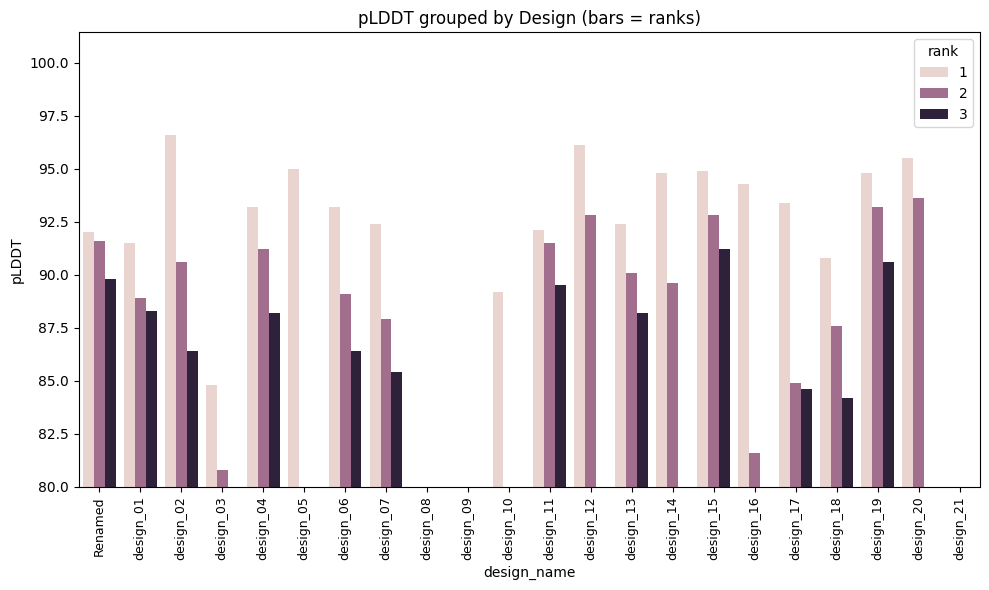

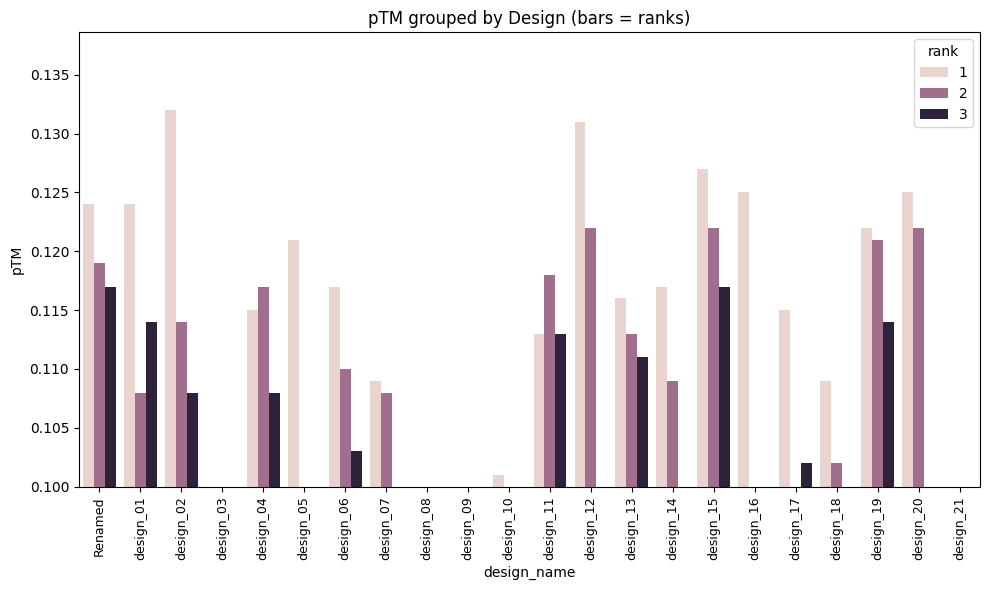

Saved plots to: /content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/plots


In [ ]:
# Colab cell: Plot pLDDT and pTM grouped by Design (rank 1/2/3)
from google.colab import drive
drive.mount('/content/drive')

import os, re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

# ---------- CONFIG ----------
log_path   = "/content/drive/MyDrive/Miniproject1/AF_on_MPNN_results/log.txt"
parsed_csv = "/content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/parsed_log_full_table.csv"
out_dir    = "/content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/plots"
# ----------------------------

Path(out_dir).mkdir(parents=True, exist_ok=True)

def parse_log_to_df(log_file):
    """Parse log.txt to DataFrame with columns: design_name, query_index, rank, model, plddt, ptm"""
    text = Path(log_file).read_text(errors="replace").splitlines()
    query_re = re.compile(r"Query\s+(\d+)\s*/\s*(\d+)\s*:\s*(.+?)(?:\s*\(|$)", re.IGNORECASE)
    rank_re = re.compile(r"rank_0*([0-9]+)_([^\s]+)\s+pLDDT=([0-9.]+)\s+pTM=([0-9.]+)", re.IGNORECASE)
    final_model_re = re.compile(r"([a-zA-Z0-9_]+)\s+recycle=\d+\s+pLDDT=([0-9.]+)\s+pTM=([0-9.]+)", re.IGNORECASE)

    queries = []
    current = None
    for ln in text:
        line = ln.strip()
        if not line:
            continue
        m = query_re.search(line)
        if m:
            current = {
                "query_idx": int(m.group(1)),
                "query_total": int(m.group(2)),
                "design_name": m.group(3).strip(),
                "lines": [],
                "ranks": []
            }
            queries.append(current)
            continue
        if current is None:
            continue
        current["lines"].append(line)
        mr = rank_re.search(line)
        if mr:
            current["ranks"].append({
                "rank": int(mr.group(1)),
                "model": mr.group(2),
                "plddt": float(mr.group(3)),
                "ptm": float(mr.group(4))
            })
    # fallback for blocks without explicit rank lines
    for q in queries:
        if q["ranks"]:
            continue
        models = []
        for ln in q["lines"]:
            mf = final_model_re.search(ln)
            if mf:
                models.append({
                    "model": mf.group(1),
                    "plddt": float(mf.group(2)),
                    "ptm": float(mf.group(3))
                })
        if models:
            for i, mm in enumerate(sorted(models, key=lambda x: -x["plddt"]), start=1):
                mm["rank"] = i
                q["ranks"].append(mm)

    rows = []
    for q in queries:
        for r in q["ranks"]:
            rows.append({
                "design_name": q["design_name"],
                "query_index": q["query_idx"],
                "rank": int(r["rank"]),
                "model": r.get("model"),
                "plddt": float(r.get("plddt")),
                "ptm": float(r.get("ptm"))
            })
    df = pd.DataFrame(rows, columns=["design_name","query_index","rank","model","plddt","ptm"])
    return df

# Load df (prefer parsed CSV if present)
if os.path.exists(parsed_csv):
    df = pd.read_csv(parsed_csv)
    print(f"Loaded parsed CSV: {parsed_csv}")
else:
    print("Parsed CSV not found — parsing log.txt now...")
    df = parse_log_to_df(log_path)
    df.to_csv(parsed_csv, index=False)
    print(f"Parsed log and saved to: {parsed_csv}")

if df.empty:
    raise RuntimeError("No data found in parsed CSV/log. Check paths and log contents.")

# Ensure designs in log order by query_index
design_order_df = df[["design_name","query_index"]].drop_duplicates().sort_values("query_index")
designs = design_order_df["design_name"].tolist()
N = len(designs)
print(f"Found {N} designs (order preserved). Example: {designs[:6]}")

# Set pastel color palette
sns.set_palette("pastel")

# ---------- PLOT 1: pLDDT grouped by design (bars for ranks) ----------
plt.figure(figsize=(max(10, N*0.35), 6))
sns.barplot(data=df, x="design_name", y="plddt", hue="rank", order=designs)
plt.xticks(rotation=90, fontsize=9)
plt.ylabel("pLDDT")
plt.title("pLDDT grouped by Design (bars = ranks)")
plt.ylim(bottom=80) # Set y-axis limit
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "pLDDT_by_design_and_rank.png"), dpi=200)
plt.show()

# ---------- PLOT 2: pTM grouped by design (bars for ranks) ----------
plt.figure(figsize=(max(10, N*0.35), 6))
sns.barplot(data=df, x="design_name", y="ptm", hue="rank", order=designs)
plt.xticks(rotation=90, fontsize=9)
plt.ylabel("pTM")
plt.title("pTM grouped by Design (bars = ranks)")
plt.ylim(bottom=0.1) # Set y-axis limit
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "pTM_by_design_and_rank.png"), dpi=200)
plt.show()

print(f"Saved plots to: {out_dir}")

In [ ]:
import pandas as pd
from pathlib import Path

# === CONFIG ===
parsed_csv = "/content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/parsed_log_full_table.csv"
out_dir = "/content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing"
# ==============

df = pd.read_csv(parsed_csv)
if df.empty:
    raise ValueError("Parsed log table is empty — check parsed_log_full_table.csv path.")

# keep only best-ranked (rank=1) models per design
df_top = df[df["rank"] == 1].copy()
df_top = df_top.sort_values("plddt", ascending=False).reset_index(drop=True)

# ---- best 3 by pLDDT ----
best3_plddt = df_top.nlargest(3, "plddt")[["design_name", "plddt", "ptm", "model"]]
best3_plddt["metric"] = "pLDDT"

# ---- best 3 by pTM ----
best3_ptm = df_top.nlargest(3, "ptm")[["design_name", "plddt", "ptm", "model"]]
best3_ptm["metric"] = "pTM"

# combine for export
top3_combined = pd.concat([best3_plddt, best3_ptm], ignore_index=True)
out_csv = Path(out_dir) / "top3_models_by_metric.csv"
top3_combined.to_csv(out_csv, index=False)

print(f"✅ Saved top-3 tables → {out_csv}\n")
print("=== Top 3 by pLDDT ===")
display(best3_plddt)

print("=== Top 3 by pTM ===")
display(best3_ptm)


✅ Saved top-3 tables → /content/drive/MyDrive/Miniproject1/AF_on_MPNN_posprocessing/top3_models_by_metric.csv

=== Top 3 by pLDDT ===


,design_name,plddt,ptm,model,metric
0,design_02,96.6,0.132,alphafold2_ptm_model_3_seed_000,pLDDT
1,design_12,96.1,0.131,alphafold2_ptm_model_3_seed_000,pLDDT
2,design_20,95.5,0.125,alphafold2_ptm_model_3_seed_000,pLDDT


=== Top 3 by pTM ===


,design_name,plddt,ptm,model,metric
0,design_02,96.6,0.132,alphafold2_ptm_model_3_seed_000,pTM
1,design_12,96.1,0.131,alphafold2_ptm_model_3_seed_000,pTM
4,design_15,94.9,0.127,alphafold2_ptm_model_3_seed_000,pTM


In [ ]:
!pip install biopython

# Calculate RMSD in models and WT

from Bio.PDB import PDBParser, Superimposer
import numpy as np
import glob, os

# Path to wild-type structure and designed models
wt_path = "/content/drive/MyDrive/Miniproject1/AF2_results/Trp_cage_2d763_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb"
design_dir = "/content/drive/MyDrive/Miniproject1/final analysis"
parser = PDBParser(QUIET=True)

# Load WT
wt_structure = parser.get_structure("WT", wt_path)
wt_atoms = [atom for atom in wt_structure.get_atoms() if atom.get_id() == "CA"]

def calc_rmsd(design_pdb):
    design_structure = parser.get_structure("DESIGN", design_pdb)
    design_atoms = [atom for atom in design_structure.get_atoms() if atom.get_id() == "CA"]
    # Align shorter of two
    n = min(len(wt_atoms), len(design_atoms))
    sup = Superimposer()
    sup.set_atoms(wt_atoms[:n], design_atoms[:n])
    return sup.rms

rmsds = []
for pdb in glob.glob(os.path.join(design_dir, "*.pdb")):
    rms = calc_rmsd(pdb)
    rmsds.append((os.path.basename(pdb), rms))

import pandas as pd
df_rmsd = pd.DataFrame(rmsds, columns=["Model", "RMSD_CA"])
df_rmsd



ModuleNotFoundError: No module named 'Bio'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.1 MB/s eta 0:00:00
